#### PROJETO 1 - CIÊNCIA DOS DADOS
André Vital Tavernaro


Engenharia A - 2° semestre

<b>Seria razoável pensar que o IDH afeta de alguma forma o número de usuários de internet de um país? E além disso, seria plausível afirmar que o acesso a informações providas da internet também afetam por sua vez a corrupção em um país?</b>

<b>introdução</b>

Eu acho que em países desenvolvidos, e que portanto possuem IDH alto, grande parte da sua população são usuários de internet,e consequentemente, com todo esse acesso à informação, o país apresenta menos corrupção. Assim para explorar a pergunta desse projeto foram observadas 3 variáveis, todas no ano de 2014, em praticamente todos os países do mundo. A primeira delas seria o Indice de desenvolvimento humano (IDH), a segunda seria o índice de corrupção , este que é medido pela Transparência Internacional que ordena os países do mundo de acordo com a sua transparencia, logo, quanto maior a 'pontuação' do país menos currupto ele é, e por fim,a terceira variável seria o número de usuários de internet de cada país em porcentagem.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

dadoshdi = pd.read_excel('hdi.xlsx')
dadoscorruprion = pd.read_excel('corruption.xlsx')
dadosinternet = pd.read_excel('internet.xlsx')

hdi2014=dadoshdi.loc[:,['geo',2014]]
cor2014=dadoscorruprion.loc[:,['geo',2014]]
int2014=dadosinternet.loc[:,['geo',2014]]

hdi2014= hdi2014.set_index('geo')
cor2014= cor2014.set_index('geo')
int2014= int2014.set_index('geo')

#ano de 2014



In [53]:
dados = hdi2014.join(cor2014,how='inner',lsuffix='_hdi',rsuffix='_cor')
dados = dados.join(int2014, how='inner')

dados['IDH'] = dados.pop('2014_hdi')
dados['indice de corrupção'] = dados.pop('2014_cor')
dados['usuários de internet'] = dados.pop(2014)


dados = dados.dropna()
#ano de 2014

Para ter certeza de que a leitura dos dados foi feito da maneira correta, resolvi imprimir a tabela com os dados.

In [54]:
dados

,IDH,indice de corrupção,usuários de internet
geo,,,
Afghanistan,0.479,12.0,7.00
Albania,0.762,33.0,60.10
Algeria,0.743,36.0,29.50
Angola,0.531,19.0,10.20
Argentina,0.826,34.0,64.70
Armenia,0.741,37.0,54.60
Australia,0.937,80.0,84.00
Austria,0.892,72.0,81.00
Azerbaijan,0.758,29.0,75.00


In [55]:
def dispersao_com_reta(dados, variavel_x, variavel_y):
    dados_X = dados[variavel_x]
    dados_Y = dados[variavel_y]
    
    # Calcula os coeficientes da reta de ajuste.
    cov = dados_X.cov(dados_Y)

    var_X = dados_X.var()
    var_Y = dados_Y.var()

    mX = dados_X.mean()
    mY = dados_Y.mean()
    
    a = cov / var_X
    b = mY - a*mX

    # Desenha o gráfico de dispersão e a reta de ajuste.
    min_X = dados_X.min()
    max_X = dados_X.max()

    plt.scatter(dados_X, dados_Y)  # dados.plot.scatter(x=variavel_X, y=variavel_Y) tambem serve!
    plt.plot((min_X, max_X), (a*min_X + b, a*max_X + b), color='red')

    #plt.title('{0} versus {1}'.format(variavel_x, variavel_y))
    plt.xlabel(variavel_x)
    plt.ylabel(variavel_y)
    
    # Retorna os coeficientes de ajuste da reta.
    return a, b

A seguir os gráficos em scatter plot das variáveis com uma linha de tendência.

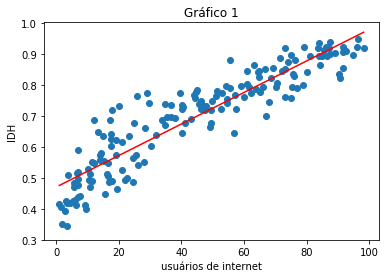

In [56]:
plt.title('Gráfico 1')
a, b = dispersao_com_reta(dados, variavel_x='usuários de internet', variavel_y='IDH')
#ano de 2014

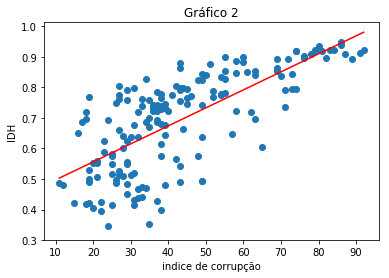

In [57]:
plt.title('Gráfico 2')
a, b = dispersao_com_reta(dados, variavel_x='indice de corrupção', variavel_y='IDH')
#ano de 2014

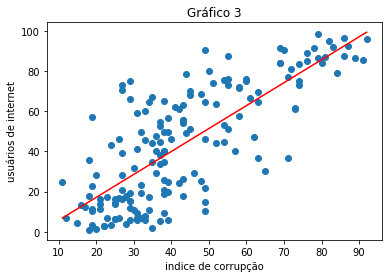

In [58]:
plt.title('Gráfico 3')
a, b = dispersao_com_reta(dados, variavel_x='indice de corrupção', variavel_y='usuários de internet')
#ano de 2014

In [59]:
dados.corr()
#ano de 2014

,IDH,indice de corrupção,usuários de internet
IDH,1.000000,0.723841,0.919402
indice de corrupção,0.723841,1.000000,0.773199
usuários de internet,0.919402,0.773199,1.000000


<b> Análise Temporal 2015</b>

Após a analise das 3 variáveis no ano de 2014, resolvi analisar também no ano de 2015, para que pudesse comparar os dados dos dois anos e assim poder dizer se minhas conclusões e predições estavam corretas.


In [60]:
hdi2015=dadoshdi.loc[:,['geo',2015]]
cor2015=dadoscorruprion.loc[:,['geo',2015]]
int2015=dadosinternet.loc[:,['geo',2015]]

hdi2015= hdi2015.set_index('geo')
cor2015= cor2015.set_index('geo')
int2015= int2015.set_index('geo')
dados1 = hdi2015.join(cor2015,how='inner',lsuffix='_hdi',rsuffix='_cor')
dados1 = dados1.join(int2015, how='inner')

dados1['IDH'] = dados1.pop('2015_hdi')
dados1['indice de corrupção'] = dados1.pop('2015_cor')
dados1['usuários de internet'] = dados1.pop(2015)

dados1 = dados1.dropna()

#ano de 2015



In [61]:
dados1.corr()
#ano de 2015

,IDH,indice de corrupção,usuários de internet
IDH,1.000000,0.736817,0.926630
indice de corrupção,0.736817,1.000000,0.774505
usuários de internet,0.926630,0.774505,1.000000


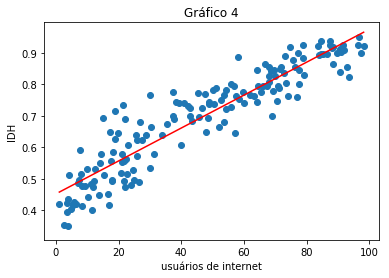

In [62]:
plt.title('Gráfico 4')
a, b = dispersao_com_reta(dados1, variavel_x='usuários de internet', variavel_y='IDH')
#ano de 2015

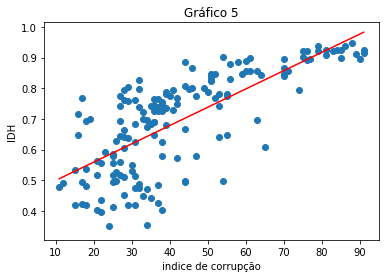

In [63]:
plt.title('Gráfico 5')
a, b = dispersao_com_reta(dados1, variavel_x='indice de corrupção', variavel_y='IDH')
#ano de 2015

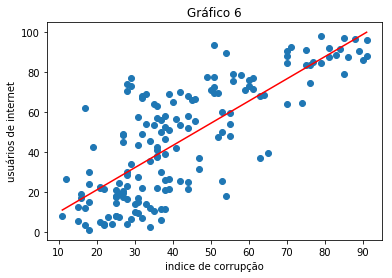

In [64]:
plt.title('Gráfico 6')
a, b = dispersao_com_reta(dados1, variavel_x='indice de corrupção', variavel_y='usuários de internet')
#ano de 2015

<b> Análise e explicação dos resultados </b>

No Gráfico 1, o IDH se encontra no eixo y, e os usuários de internet no eixo x. Observando o comportamento do gráfico e o coeficiente de correlação, nota-se que as duas variáveis tem uma correlação positiva e muito forte, já que quando uma delas aumenta a outra aumenta também, além disso o coeficiente de correlação de 0.91, que é extremamente alto, indica que as duas variáveis estão muito relacionadas. Logo, uma parte da resposta para a pergunta proposta seria que o IDH afeta o número de usuários de internet de um páis positivamente.

No Gráfico 2, o IDH se encontra no eixo y, e o índice de corrupção no eixo x. Observando o comportamento do gráfico e o coeficiente de correlação, nota-se que as duas variáveis tem uma correlação forte e positiva, já que quando uma delas aumenta a outra aumenta também, além disso o coeficiente de correlação de 0.72 indica que as duas variáveis estão bem relacionadas. Logo, pode-se concluir que o IDH afeta o indice de corrupção de um páis positivamente,  no sentido de que quanto maior o IDH menor a corrupção.

No Gráfico 3, os usuários de internet se encontra no eixo y, e o índice de corrupção no eixo x. Observando o comportamento do gráfico e o coeficiente de correlação, nota-se que as duas variáveis tem uma correlação forte e positiva, já que quando uma delas aumenta a outra aumenta também, além disso o coeficiente de correlação de 0.77 indica que as duas variáveis estão mais relacionadas ainda que o IDH e o indice de corrupção. Logo, outra parte da resposta para a pergunta proposta seria que o número de usuários de internet afeta o indice de corrupção de um páis positivamente, no sentido de que quanto mais acesso a internet, menor a corrupção.

Os Gráficos 4,5 e 6, que possuem os mesmos eixos dos gráficos 1,2 e 3 respectivamente, serviram para fazer uma predição com os dados de 2015 e confirmar se de fato as conclusões obtidas com os 3 primeiros gráficos se aplicaram na realidade. É importante notar que os dados comparados foram de 2014 e 2015, ou seja, só se passou um ano entre a coleta dos dados, por isso não é possível dizer com toda certeza se essa 'tendência' se manterá para um futuro mais distante. Se observarmos o comportamento dos gráficos e o coeficiente de correlação notamos que os dados dos dois anos são muito semelhantes, com diferenças mínimas, ou seja, a 'tendência' prevista é bastante razoável para um futuro mais próximo já que esta se mantém quase que a mesma. 

<b>Conclusão</b>

Portanto, analisando os dados por meio dos gráficos obtidos, e observando também o índice de correlação entre as variáveis pode-se afirmar que quanto maior o IDH de um país maior o número de usuários de internet, e quanto maior esse número for, menor a corrupção desse país é. Uma das possíveis justificativas seria que quanto mais desenvolvido o país for, maior a estrutura e poder aquisitivo de sua população, logo grande parte de sua população são usuários de internet, e esse acesso à informação torna a população menos ignorante e faz com que ela se interesse mais com a situação política de seu país, diminuindo assim de certo modo a corrupção. Logo, como todas as variáveis monitoradas afetam de alguma forma a outra, seria razoável dizer que tudo isso seria um ciclo vicioso, quanto maior o IDH, maior o número de usuários de internet e menor a corrupção de um país, e vice e versa.
